In [91]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#Read file of joined Yelp Business & Review data
df = pd.read_csv('../Output_Folder/3_Table.csv')
df.head(5)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,"Had a party of 6 here for hibachi. Our waitress brought our separate sushi orders on one plate so we couldn't really tell who's was who's and forgot several items on an order. I understand making mistakes but the restaraunt was really quiet so we were kind of surprised. Usually hibachi is a fun lively experience and our cook said maybe three words, but he cooked very well his name was Francisco. Service was fishy, food was pretty good, and im hoping it was just an off night here. But for the money I wouldn't go back.",2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'BYOBCorkage': ""'yes_free'"", 'RestaurantsGoodForGroups': 'True', 'BusinessAcceptsCreditCards': 'True', 'WiFi': ""u'no'"", 'RestaurantsPriceRange2': '2', 'NoiseLevel': ""u'average'"", 'BikeParking': 'True', 'HasTV': 'False', 'GoodForKids': 'True', 'Alcohol': ""u'beer_and_wine'"", 'Caters': 'False', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}"", 'HappyHour': 'True', 'WheelchairAccessible': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'BusinessAcceptsBitcoin': 'False', 'DogsAllowed': 'False', 'RestaurantsDelivery': 'True', 'BYOB': 'False', 'OutdoorSeating': 'False', 'Ambience': ""{u'divey': False, u'hipster': False, u'casual': True, u'touristy': None, u'trendy': None, u'intimate': False, u'romantic': False, u'classy': True, u'upscale': False}""}","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'}
1,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5,0,0,0,"What a great addition to the Funk Zone! Grab a bite, grab some tastings, life is good. Right next door to the Santa Barbara Wine Collective, in fact it actually shares the same tables. We had a fabulous savory croissant.",2016-10-13 22:50:47,Helena Avenue Bakery,...,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""u'average'"", 'Caters': 'True', 'Ambience': ""{'touristy': False, 'hipster': True, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': True, 'upscale': False, 'classy': False, 'casual': True}"", 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTableService': 'False', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '2', 'WheelchairAccessible': 'True', 'OutdoorSeating': 'True', 'RestaurantsDelivery': 'None', 'HasTV': 'False', 'RestaurantsAttire': ""'casual'"", 'Alcohol': ""u'none'"", 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': True, 'breakfast': True}"", 'DogsAllowed': 'True', 'RestaurantsGoodForGroups': 'True', 'HappyHour': 'False', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'BikeParking': 'True', 'WiFi': ""u'no'""}","Food, Restaurants, Salad, Coffee & Tea, Breakfast & Brunch, Sandwiches, Bakeries","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', 'Wednesday': '8:0-14:0', 'Thursday': '8:0-14:0', 'Friday': '8:0-14:0', 'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
2,2u5Skti5mZam_-XTKPelvA,IMd3NQbclta91pFKk3AJZg,qO9dNNIvNbCBd8ZgjxMxgQ,5,0,0,0,"Farmhouse, rustic, chic.Helpful staff with great ideas to decorate your home. Prices reasonable. Store has items from Joanna Gaines ( Fixer Upper) and much more. Finally a good home store in SB with reasonable prices.",2017-04-08 00:33:11,HOME Santa Barbara,...,CA,93101,34.414912,-119.694171,4.5,13,1,"{'WheelchairAccessible': 'True'

In [92]:
df.shape

(2346, 22)

Sentiment Analysis: https://medium.com/analytics-vidhya/sentiment-analysis-on-amazon-reviews-using-tf-idf-approach-c5ab4c36e7a1

In [93]:
df2 = df[['review_id','text','stars_x']]
df2.head()

,review_id,text,stars_x
0,pUycOfUwM8vqX7KjRRhUEA,"Had a party of 6 here for hibachi. Our waitress brought our separate sushi orders on one plate so we couldn't really tell who's was who's and forgot several items on an order. I understand making mistakes but the restaraunt was really quiet so we were kind of surprised. Usually hibachi is a fun lively experience and our cook said maybe three words, but he cooked very well his name was Francisco. Service was fishy, food was pretty good, and im hoping it was just an off night here. But for the money I wouldn't go back.",3
1,L0jv8c2FbpWSlfNC6bbUEA,"What a great addition to the Funk Zone! Grab a bite, grab some tastings, life is good. Right next door to the Santa Barbara Wine Collective, in fact it actually shares the same tables. We had a fabulous savory croissant.",5
2,2u5Skti5mZam_-XTKPelvA,"Farmhouse, rustic, chic.Helpful staff with great ideas to decorate your home. Prices reasonable. Store has items from Joanna Gaines ( Fixer Upper) and much more. Finally a good home store in SB with reasonable prices.",5
3,4zopEEPqfwm-c_FNpeHZYw,"We were a bit weary about trying the Shellfish Company on the Wharf as more often than not, many places like these (see Cannery Row, Monterey) feast on a captive audience and provide sub-standard fare at high prices.\n\nHowever, emboldened by the perennial good reviews on Yelp, we suppressed our initial observations and went ahead with the trying it out. The place is small, so definitely plan ahead. You will have to wait, so either you know, just do so, or perhaps try to visit outside of peak hours. Luckily, our wait was only about 20 minutes as the dinner rush was just leveling off.\n\nThe special was the local rock crab - $25 for 3 lbs of California Rock Crab, salad, and your choice of soup/chowder. After taking a look at a few trays of rock crab being served out, the wife and I both opted for it, as it looked awesome. \n\nThe salad/chowder combo was great as you actually received hearty portions of each, so it was a good start. As much as I liked the chowder however, the Shrimp Bisque the wife ordered was amazing, so I would recommend that going forward. \n\nBut enough of prattling on about side dishes: the rock crab tasted just as glorious as it looked. Juicy, buttery chunks of white crab meat await you, just a few cracks away. While the rock crab shells are pretty thick, once cracked, they splinter and separate easily, a good sign they are cooked to perfection. The rock crabs provided a great amount of meat for what I felt to be the least amount of work you're going to do for crab, King or otherwise. \n\nWe were thoroughly satisfied with our meal and along with the special being an overall great value, devouring the Rock Crab at SBSC turned out to be one of the favorite meals on the trip. I think ordering crab here is a safe proposition indeed.",5
4,HuWEnZr7-0HveaqXxyywgg,"The kayaking tour at the Santa Cruz Island was great. My husband and I had a wonderful time. Jen, our tour guide, was helpful and informative. We had a lot of fun exploring the caves. We didn't expect much but this tour definitely exceeded our expectation.",5


In [94]:
df.shape

(2346, 22)

In [95]:
df=df.dropna()
df = df.reset_index(drop=True)
df.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,"Had a party of 6 here for hibachi. Our waitress brought our separate sushi orders on one plate so we couldn't really tell who's was who's and forgot several items on an order. I understand making mistakes but the restaraunt was really quiet so we were kind of surprised. Usually hibachi is a fun lively experience and our cook said maybe three words, but he cooked very well his name was Francisco. Service was fishy, food was pretty good, and im hoping it was just an off night here. But for the money I wouldn't go back.",2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'BYOBCorkage': ""'yes_free'"", 'RestaurantsGoodForGroups': 'True', 'BusinessAcceptsCreditCards': 'True', 'WiFi': ""u'no'"", 'RestaurantsPriceRange2': '2', 'NoiseLevel': ""u'average'"", 'BikeParking': 'True', 'HasTV': 'False', 'GoodForKids': 'True', 'Alcohol': ""u'beer_and_wine'"", 'Caters': 'False', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}"", 'HappyHour': 'True', 'WheelchairAccessible': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'BusinessAcceptsBitcoin': 'False', 'DogsAllowed': 'False', 'RestaurantsDelivery': 'True', 'BYOB': 'False', 'OutdoorSeating': 'False', 'Ambience': ""{u'divey': False, u'hipster': False, u'casual': True, u'touristy': None, u'trendy': None, u'intimate': False, u'romantic': False, u'classy': True, u'upscale': False}""}","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'}
1,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5,0,0,0,"What a great addition to the Funk Zone! Grab a bite, grab some tastings, life is good. Right next door to the Santa Barbara Wine Collective, in fact it actually shares the same tables. We had a fabulous savory croissant.",2016-10-13 22:50:47,Helena Avenue Bakery,...,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""u'average'"", 'Caters': 'True', 'Ambience': ""{'touristy': False, 'hipster': True, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': True, 'upscale': False, 'classy': False, 'casual': True}"", 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTableService': 'False', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '2', 'WheelchairAccessible': 'True', 'OutdoorSeating': 'True', 'RestaurantsDelivery': 'None', 'HasTV': 'False', 'RestaurantsAttire': ""'casual'"", 'Alcohol': ""u'none'"", 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': True, 'breakfast': True}"", 'DogsAllowed': 'True', 'RestaurantsGoodForGroups': 'True', 'HappyHour': 'False', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'BikeParking': 'True', 'WiFi': ""u'no'""}","Food, Restaurants, Salad, Coffee & Tea, Breakfast & Brunch, Sandwiches, Bakeries","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', 'Wednesday': '8:0-14:0', 'Thursday': '8:0-14:0', 'Friday': '8:0-14:0', 'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
2,2u5Skti5mZam_-XTKPelvA,IMd3NQbclta91pFKk3AJZg,qO9dNNIvNbCBd8ZgjxMxgQ,5,0,0,0,"Farmhouse, rustic, chic.Helpful staff with great ideas to decorate your home. Prices reasonable. Store has items from Joanna Gaines ( Fixer Upper) and much more. Finally a good home store in SB with reasonable prices.",2017-04-08 00:33:11,HOME Santa Barbara,...,CA,93101,34.414912,-119.694171,4.5,13,1,"{'WheelchairAccessible': 'True'

In [96]:
df.shape

(2214, 22)

In [97]:
# Label the 4 & 5 star reviews as positive ('1') and 
# label the 1 & 2 star reviews as negative ('0'). 
# Drop the 3 star reviews as they are neutral

df['stars_x']=df['stars_x'].astype(int) #convert stars column to int

df=df[df['stars_x']!=3] #Drop 3-star reviews
df['label']=np.where(df['stars_x']>=4,1,0) #1-Positive, 0-Negative

df.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,label
1,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5,0,0,0,"What a great addition to the Funk Zone! Grab a bite, grab some tastings, life is good. Right next door to the Santa Barbara Wine Collective, in fact it actually shares the same tables. We had a fabulous savory croissant.",2016-10-13 22:50:47,Helena Avenue Bakery,...,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""u'average'"", 'Caters': 'True', 'Ambience': ""{'touristy': False, 'hipster': True, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': True, 'upscale': False, 'classy': False, 'casual': True}"", 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTableService': 'False', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '2', 'WheelchairAccessible': 'True', 'OutdoorSeating': 'True', 'RestaurantsDelivery': 'None', 'HasTV': 'False', 'RestaurantsAttire': ""'casual'"", 'Alcohol': ""u'none'"", 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': True, 'breakfast': True}"", 'DogsAllowed': 'True', 'RestaurantsGoodForGroups': 'True', 'HappyHour': 'False', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'BikeParking': 'True', 'WiFi': ""u'no'""}","Food, Restaurants, Salad, Coffee & Tea, Breakfast & Brunch, Sandwiches, Bakeries","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', 'Wednesday': '8:0-14:0', 'Thursday': '8:0-14:0', 'Friday': '8:0-14:0', 'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}",1
2,2u5Skti5mZam_-XTKPelvA,IMd3NQbclta91pFKk3AJZg,qO9dNNIvNbCBd8ZgjxMxgQ,5,0,0,0,"Farmhouse, rustic, chic.Helpful staff with great ideas to decorate your home. Prices reasonable. Store has items from Joanna Gaines ( Fixer Upper) and much more. Finally a good home store in SB with reasonable prices.",2017-04-08 00:33:11,HOME Santa Barbara,...,93101,34.414912,-119.694171,4.5,13,1,"{'WheelchairAccessible': 'True', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2'}","Home & Garden, Furniture Stores, Home Decor, Shopping, Flowers & Gifts, Gift Shops","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', 'Wednesday': '9:0-17:0', 'Thursday': '9:0-17:0', 'Friday': '9:0-17:0', 'Saturday': '10:0-15:0'}",1
3,4zopEEPqfwm-c_FNpeHZYw,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5,0,0,0,"We were a bit weary about trying the Shellfish Company on the Wharf as more often than not, many places like these (see Cannery Row, Monterey) feast on a captive audience and provide sub-standard fare at high prices.\n\nHowever, emboldened by the perennial good reviews on Yelp, we suppressed our initial observations and went ahead with the trying it out. The place is small, so definitely plan ahead. You will have to wait, so either you know, just do so, or perhaps try to visit outside of peak hours. Luckily, our wait was only about 20 minutes as the dinner rush was just leveling off.\n\nThe special was the local rock crab - $25 for 3 lbs of California Rock Crab, salad, and your choice of soup/chowder. After taking a look at a few trays of rock crab being served out, the wife and I both opted for it, as it looked awesome. \n\nThe salad/chowder combo was great as you actually received hearty portions of each, so it was a good start. As much as I liked the chowder however, the Shrimp Bisque the wife ordered was amazing, so I would recommend that going forward. \n\nBut enough of prattling on about side dishes: the rock crab tasted just as glorious as it looked. Juicy, buttery chunks of white crab meat await you, just a few cracks away. While the rock crab shells are pretty thick, once cracked, they splinter and separate easily, a good sign they are cooked to perfection. The rock crabs provided a great amount of meat 

In [98]:
df2 = df[['stars_x', 'label']]
df2.head()

,stars_x,label
1,5,1
2,5,1
3,5,1
4,5,1
5,4,1


In [99]:
# Get the number of reviews and group by star rating
df['stars_x'].value_counts()

5    1122
4     541
1     190
2     135
Name: stars_x, dtype: int64

In [100]:
df = df.sample(frac=1).reset_index(drop=True) #shuffle
data=df[df['label']==0][:2300]
data=data.append(df[df['label']==1][:10000])
data = data.reset_index(drop=True)
display(data['label'].value_counts())
data


1    1663
0     325
Name: label, dtype: int64

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,label
0,7Lsue1__5v3-Y_PF2CS7bA,4LbxeQIyej3mr6HYYTsd7Q,SZU9c8V2GuREDN5KgyHFJw,1,0,0,0,First off the bathroom smell like dirty seafood which almost took away my appetite to start with we order the king crab and lobster tacos there was hardly any meat in the king crab and considering that it was more expensive than the 3 pounds of a different kind of crab you would think that there would've been plenty of meat My lobster tacos was over an under cooked but the next two days hunched over the toilet so disappointed,2016-04-23 22:06:09,Santa Barbara Shellfish Company,...,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'NoiseLevel': ""u'average'"", 'RestaurantsPriceRange2': '2', 'RestaurantsGoodForGroups': 'False', 'WiFi': ""u'no'"", 'Alcohol': ""'beer_and_wine'"", 'RestaurantsTakeOut': 'True', 'BikeParking': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': True, 'lot': False, 'valet': False}"", 'HasTV': 'False', 'ByAppointmentOnly': 'False', 'GoodForKids': 'True', 'Caters': 'False', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': True}"", 'RestaurantsDelivery': 'True', 'HappyHour': 'False', 'Music': ""{u'dj': False, u'live': False, u'jukebox': False, u'video': False, u'background_music': False, u'karaoke': False, u'no_music': False}"", 'GoodForMeal': ""{u'breakfast': False, u'brunch': None, u'lunch': True, u'dinner': True, u'latenight': False, u'dessert': False}"", 'CoatCheck': 'False', 'BestNights': ""{u'monday': False, u'tuesday': False, u'wednesday': False, u'thursday': False, u'friday': False, u'saturday': True, u'sunday': False}"", 'BusinessAcceptsBitcoin': 'False'}","Live/Raw Food, Restaurants, Seafood, Beer Bar, Beer, Wine & Spirits, Bars, Food, Nightlife","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-14:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0', 'Sunday': '11:0-21:0'}",0
1,NZzgLC06h1lXpgqYeHVSxQ,ZbDR27cCgShAdKU2TQXwKg,q6661I3CGW0UB740E5Zjfw,1,1,0,0,"Quite possibly the worst ""indian"" food I have ever experienced. Not a hater. This is based on takeout so I have no experience with the service.\n\nBland, bland, bland, burnt, and awful. Love Indian food. I wish this approximated it.\n\nOur order consisted of fairly pedantic fare, as far as Indian goes:\n\n-pappadam...not on menu they went to the Nepalese place across the street to buy it...chutney. ...noooope\n- chicken tikka (date ordered it , don't judge) tasted like tomato soup with tandoori chix\n- chicken jalfreizi, ordered Indian spicy, had canned veggies in it, in a broth - like substance, unedible\n- Naan- was ABC and dry, oh and burnt-to-beat-the-band.\n- garlic kulcha- only edible item. Tho it was neither garlic or kulcha\n\nAll for the low, low price of 70 cold stones. \n\nIf you like a bizzaro world of Sysco ""Indian food"" this your place. If u want anything close to Indian.....wide berth from your local India garden.",2015-03-05 04:49:10,India House,...,93101,34.416540,-119.694577,2.0,136,0,"{'RestaurantsAttire': ""u'casual'"", 'WiFi': ""u'free'"", 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Alcohol': ""u'beer_and_wine'"", 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True', 'Caters': 'False', 'RestaurantsPriceRange2': '2', 'NoiseLevel': ""u'average'"", 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'HasTV': 'True', 'RestaurantsDelivery': 'False', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy

Pre-Processing

In [101]:
# Convert all reviews into the lower case
data['pre_process'] = data['text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [102]:
# Perform the Contractions on the reviews text, eg 'it won't be' becomes 'it will not be'
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", " would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
data['pre_process']=data['pre_process'].apply(lambda x:contractions(x))


In [103]:
# Remove non-alpha characters
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [104]:
# Remove the extra spaces between the words
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(' +', ' ', x))


In [105]:
# Remove the stop words by using the NLTK package
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [106]:
# Perform lemmatization using the wordnet lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [107]:
data

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,label,pre_process
0,7Lsue1__5v3-Y_PF2CS7bA,4LbxeQIyej3mr6HYYTsd7Q,SZU9c8V2GuREDN5KgyHFJw,1,0,0,0,First off the bathroom smell like dirty seafood which almost took away my appetite to start with we order the king crab and lobster tacos there was hardly any meat in the king crab and considering that it was more expensive than the 3 pounds of a different kind of crab you would think that there would've been plenty of meat My lobster tacos was over an under cooked but the next two days hunched over the toilet so disappointed,2016-04-23 22:06:09,Santa Barbara Shellfish Company,...,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'NoiseLevel': ""u'average'"", 'RestaurantsPriceRange2': '2', 'RestaurantsGoodForGroups': 'False', 'WiFi': ""u'no'"", 'Alcohol': ""'beer_and_wine'"", 'RestaurantsTakeOut': 'True', 'BikeParking': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': True, 'lot': False, 'valet': False}"", 'HasTV': 'False', 'ByAppointmentOnly': 'False', 'GoodForKids': 'True', 'Caters': 'False', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': True}"", 'RestaurantsDelivery': 'True', 'HappyHour': 'False', 'Music': ""{u'dj': False, u'live': False, u'jukebox': False, u'video': False, u'background_music': False, u'karaoke': False, u'no_music': False}"", 'GoodForMeal': ""{u'breakfast': False, u'brunch': None, u'lunch': True, u'dinner': True, u'latenight': False, u'dessert': False}"", 'CoatCheck': 'False', 'BestNights': ""{u'monday': False, u'tuesday': False, u'wednesday': False, u'thursday': False, u'friday': False, u'saturday': True, u'sunday': False}"", 'BusinessAcceptsBitcoin': 'False'}","Live/Raw Food, Restaurants, Seafood, Beer Bar, Beer, Wine & Spirits, Bars, Food, Nightlife","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-14:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0', 'Sunday': '11:0-21:0'}",0,first bathroom smell like dirty seafood almost took away appetite start order king crab lobster taco hardly meat king crab considering expensive pound different kind crab would think would plenty meat lobster taco cooked next two day hunched toilet disappointed
1,NZzgLC06h1lXpgqYeHVSxQ,ZbDR27cCgShAdKU2TQXwKg,q6661I3CGW0UB740E5Zjfw,1,1,0,0,"Quite possibly the worst ""indian"" food I have ever experienced. Not a hater. This is based on takeout so I have no experience with the service.\n\nBland, bland, bland, burnt, and awful. Love Indian food. I wish this approximated it.\n\nOur order consisted of fairly pedantic fare, as far as Indian goes:\n\n-pappadam...not on menu they went to the Nepalese place across the street to buy it...chutney. ...noooope\n- chicken tikka (date ordered it , don't judge) tasted like tomato soup with tandoori chix\n- chicken jalfreizi, ordered Indian spicy, had canned veggies in it, in a broth - like substance, unedible\n- Naan- was ABC and dry, oh and burnt-to-beat-the-band.\n- garlic kulcha- only edible item. Tho it was neither garlic or kulcha\n\nAll for the low, low price of 70 cold stones. \n\nIf you like a bizzaro world of Sysco ""Indian food"" this your place. If u want anything close to Indian.....wide berth from your local India garden.",2015-03-05 04:49:10,India House,...,34.416540,-119.694577,2.0,136,0,"{'RestaurantsAttire': ""u'casual'"", 'WiFi': ""u'free'"", 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Alcohol': ""u'beer_and_wine'"", 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True', 'Caters': 'False', 'RestaurantsPriceRange2': '2', 'NoiseLevel': ""u'average'"", 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 

In [108]:
data.to_csv('../Output_folder/Three_Table.csv', index=False)

In [109]:
post_process = data['pre_process']

print(post_process)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            first bathroom smell like dirty seafood almost took away appetite start order king crab lobster taco hardly meat king crab considering expensive pound different kind crab would think woul

In [110]:
#data.to_csv('../Output_folder/3_pre_process.csv')
#df2.to_csv('Naive_data.csv', index=False)

In [111]:
#instantiate CountVectorizer() 
cv=CountVectorizer() 

# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(post_process).toarray()

word_count_vector.shape

(1988, 8691)

In [112]:
word_count_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
rough_naive_data = [word_count_vector,data]

rough_naive_data

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
                    review_id                 user_id             business_id  \
 0     7Lsue1__5v3-Y_PF2CS7bA  4LbxeQIyej3mr6HYYTsd7Q  SZU9c8V2GuREDN5KgyHFJw   
 1     NZzgLC06h1lXpgqYeHVSxQ  ZbDR27cCgShAdKU2TQXwKg  q6661I3CGW0UB740E5Zjfw   
 2     GLJgz8OT1Naw8CtisNTdow  PoTB7fwV--PaX-z_yhLXdA  5hJZe_v9Ax5GjXJCMQ9ijw   
 3     IYleeBcfoXlgwMeRcEFAUQ  jYyUWgcy2FiEIMPwj988PQ  HQ-C47_Xi5it1KzwEc0u0A   
 4     k0xQrwbjdb9DqoWSPmcG1g  HtPSa9IIR4q9bSSAcrbyIw  noByYNtDLQAra9ccqxdfDw   
 ...                      ...                     ...                     ...   
 1983  SBxB-mPGBMBGQbW4pyNasA  GXn4ZsasLKh0qZ5g3nIqcQ  29YqJwOGEuAWqlHZxMc1OA   
 1984  YPBresB5TNp6366t03BbZg  Rw0vCeikk9aS2Z_CzXedFA  -ujBP1Dw0j1-Ffaz97-LXQ   
 1985  EaMgr7-58PVyqAQXsQn-KQ  PGAEw4DI5eZhLn

In [114]:
data['word_count_vector'] = word_count_vector.tolist()

data

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,longitude,stars_y,review_count,is_open,attributes,categories,hours,label,pre_process,word_count_vector
0,7Lsue1__5v3-Y_PF2CS7bA,4LbxeQIyej3mr6HYYTsd7Q,SZU9c8V2GuREDN5KgyHFJw,1,0,0,0,First off the bathroom smell like dirty seafood which almost took away my appetite to start with we order the king crab and lobster tacos there was hardly any meat in the king crab and considering that it was more expensive than the 3 pounds of a different kind of crab you would think that there would've been plenty of meat My lobster tacos was over an under cooked but the next two days hunched over the toilet so disappointed,2016-04-23 22:06:09,Santa Barbara Shellfish Company,...,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'NoiseLevel': ""u'average'"", 'RestaurantsPriceRange2': '2', 'RestaurantsGoodForGroups': 'False', 'WiFi': ""u'no'"", 'Alcohol': ""'beer_and_wine'"", 'RestaurantsTakeOut': 'True', 'BikeParking': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': True, 'lot': False, 'valet': False}"", 'HasTV': 'False', 'ByAppointmentOnly': 'False', 'GoodForKids': 'True', 'Caters': 'False', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': True}"", 'RestaurantsDelivery': 'True', 'HappyHour': 'False', 'Music': ""{u'dj': False, u'live': False, u'jukebox': False, u'video': False, u'background_music': False, u'karaoke': False, u'no_music': False}"", 'GoodForMeal': ""{u'breakfast': False, u'brunch': None, u'lunch': True, u'dinner': True, u'latenight': False, u'dessert': False}"", 'CoatCheck': 'False', 'BestNights': ""{u'monday': False, u'tuesday': False, u'wednesday': False, u'thursday': False, u'friday': False, u'saturday': True, u'sunday': False}"", 'BusinessAcceptsBitcoin': 'False'}","Live/Raw Food, Restaurants, Seafood, Beer Bar, Beer, Wine & Spirits, Bars, Food, Nightlife","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-14:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0', 'Sunday': '11:0-21:0'}",0,first bathroom smell like dirty seafood almost took away appetite start order king crab lobster taco hardly meat king crab considering expensive pound different kind crab would think would plenty meat lobster taco cooked next two day hunched toilet disappointed,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,NZzgLC06h1lXpgqYeHVSxQ,ZbDR27cCgShAdKU2TQXwKg,q6661I3CGW0UB740E5Zjfw,1,1,0,0,"Quite possibly the worst ""indian"" food I have ever experienced. Not a hater. This is based on takeout so I have no experience with the service.\n\nBland, bland, bland, burnt, and awful. Love Indian food. I wish this approximated it.\n\nOur order consisted of fairly pedantic fare, as far as Indian goes:\n\n-pappadam...not on menu they went to the Nepalese place across the street to buy it...chutney. ...noooope\n- chicken tikka (date ordered it , don't judge) tasted like tomato soup with tandoori chix\n- chicken jalfreizi, ordered Indian spicy, had canned veggies in it, in a broth - like substance, unedible\n- Naan- was ABC and dry, oh and burnt-to-beat-the-band.\n- garlic kulcha- only edible item. Tho it was neither garlic or kulcha\n\nAll for the low, low price of 70 cold stones. \n\nIf you like a bizzaro world of Sysco ""Indian food"" this your place. If u want anything close to Indian.....wide berth from your local India garden.",2015-03-05 04:49:10,India House,...,-119.694577,2.0,136,0,"{'RestaurantsAttire': ""u'casual'"", 'WiFi': ""u'free'

In [115]:
data.to_csv('../Output_folder/3_Table.csv', index=False)

In [116]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(data['pre_process'], data['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (1491,) (1491,) Test:  ((497,), (497,))


In [117]:
print("TFIDF Vectorizer……")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [118]:
# Implementing SVM with sklearn for classification
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [119]:
# Fitting the Training data into model
clf.fit(tf_x_train,Y_train)

LinearSVC(random_state=0)

In [120]:
# Predicting the Test data
y_test_pred=clf.predict(tf_x_test)

<AxesSubplot:>

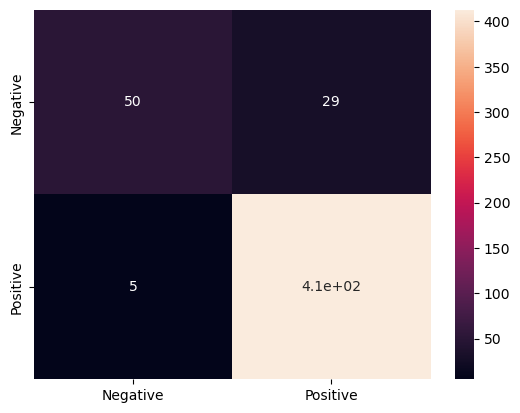

In [121]:
from sklearn import metrics
import seaborn as sns
#pred = voting.predict(x_test_tfidf)
cm=metrics.confusion_matrix(Y_test, y_test_pred)
cm = pd.DataFrame(cm, index = ["Negative", "Positive"], columns=["Negative", "Positive"])
sns.heatmap(cm, annot = True)

In [122]:
# Analyzing the results
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)
report

{'0': {'precision': 0.9090909090909091,
  'recall': 0.6329113924050633,
  'f1-score': 0.746268656716418,
  'support': 79},
 '1': {'precision': 0.9343891402714932,
  'recall': 0.9880382775119617,
  'f1-score': 0.9604651162790698,
  'support': 418},
 'accuracy': 0.93158953722334,
 'macro avg': {'precision': 0.9217400246812011,
  'recall': 0.8104748349585125,
  'f1-score': 0.853366886497744,
  'support': 497},
 'weighted avg': {'precision': 0.9303678922568731,
  'recall': 0.93158953722334,
  'f1-score': 0.9264177917208214,
  'support': 497}}

In [123]:
# Logistic Regression is implemented using sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, solver='saga')

In [124]:
# Fit the training data to the model
clf.fit(tf_x_train, Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [125]:
# Predicting the test data
y_test_pred=clf.predict(tf_x_test)

In [126]:
# Analyzing the report
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_test_pred, output_dict=True)
report

{'0': {'precision': 1.0,
  'recall': 0.22784810126582278,
  'f1-score': 0.3711340206185567,
  'support': 79},
 '1': {'precision': 0.872651356993737,
  'recall': 1.0,
  'f1-score': 0.9319955406911928,
  'support': 418},
 'accuracy': 0.8772635814889336,
 'macro avg': {'precision': 0.9363256784968685,
  'recall': 0.6139240506329113,
  'f1-score': 0.6515647806548748,
  'support': 497},
 'weighted avg': {'precision': 0.8928938978337667,
  'recall': 0.8772635814889336,
  'f1-score': 0.8428445143617397,
  'support': 497}}

##This model proved to be our most successful 

In [127]:
#the first is random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rmfr = RandomForestClassifier()
rmfr.fit(tf_x_train,Y_train)
predrmfr = rmfr.predict(tf_x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(Y_test,predrmfr))
print("Score:",round(accuracy_score(Y_test,predrmfr)*100,2))
print("Classification Report:\n",classification_report(Y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 22  57]
 [  2 416]]
Score: 88.13
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.28      0.43        79
           1       0.88      1.00      0.93       418

    accuracy                           0.88       497
   macro avg       0.90      0.64      0.68       497
weighted avg       0.89      0.88      0.85       497



In [128]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(tf_x_train,Y_train)
preddt = dt.predict(tf_x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Y_test,preddt))
print("Score:",round(accuracy_score(Y_test,preddt)*100,2))
print("Classification Report:\n",classification_report(Y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 42  37]
 [ 30 388]]
Score: 86.52
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.53      0.56        79
           1       0.91      0.93      0.92       418

    accuracy                           0.87       497
   macro avg       0.75      0.73      0.74       497
weighted avg       0.86      0.87      0.86       497



In [129]:
#support vector machines
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(tf_x_train,Y_train)
predsvm = svm.predict(tf_x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(Y_test,predsvm))
print("Score:",round(accuracy_score(Y_test,predsvm)*100,2))
print("Classification Report:\n",classification_report(Y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 21  58]
 [  0 418]]
Score: 88.33
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.27      0.42        79
           1       0.88      1.00      0.94       418

    accuracy                           0.88       497
   macro avg       0.94      0.63      0.68       497
weighted avg       0.90      0.88      0.85       497



In [130]:
#count = CountVectorizer()

#idf_x_test = vectorizer.fit_transform(tf_x_test).toarray()

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])



#inverse document frequency
df_idf.sort_values(by=["idf_weights"])

C:\Users\david\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
place,1.971322
great,1.986038
good,2.225486
food,2.246248
would,2.451202
...,...
om,7.902240
olive,7.902240
olderexotics,7.902240
customary,7.902240


In [131]:
# count matrix 
count_vector=cv.transform(post_process) 

# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [132]:
feature_names = cv.get_feature_names() 

#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 

#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

C:\Users\david\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
crab,0.310948
king,0.310706
meat,0.289171
lobster,0.244989
taco,0.237502
...,...
fishyi,0.000000
fishy,0.000000
fishman,0.000000
fishing,0.000000


In [133]:
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 

# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(post_process)

In [134]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 

# place tf-idf values in a pandas data frame 
post_df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"]) 
post_df.sort_values(by=["tfidf"],ascending=False)

C:\Users\david\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
crab,0.310948
king,0.310706
meat,0.289171
lobster,0.244989
taco,0.237502
...,...
fishyi,0.000000
fishy,0.000000
fishman,0.000000
fishing,0.000000


In [135]:
#from sklearn.feature_extraction.text import TfidfVectorizer
text_string = [' '.join(data['pre_process'])]
text_string

['first bathroom smell like dirty seafood almost took away appetite start order king crab lobster taco hardly meat king crab considering expensive pound different kind crab would think would plenty meat lobster taco cooked next two day hunched toilet disappointed quite possibly worst indian food ever experienced hater based takeout experience service bland bland bland burnt awful love indian food wish approximated order consisted fairly pedantic fare far indian go pappadam menu went nepalese place across street buy chutney noooope chicken tikka date ordered judge tasted like tomato soup tandoori chix chicken jalfreizi ordered indian spicy canned veggie broth like substance unedible naan abc dry oh burnttobeattheband garlic kulcha edible item tho neither garlic kulcha low low price cold stone like bizzaro world sysco indian food place u want anything close indian wide berth local india garden last time use fedex office went passport photo two guy working ten minute standing counter neit

In [136]:
)

ValueError: not enough values to unpack (expected 2, got 1)

In [137]:
from wordcloud import STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
import re

#text_string = re.sub('[^a-zA-Z]', '', str(text_string))
#print(text_string)

stop_words = ["went", "really", "go", "going", "place", "day", "night", "one", "alway", "say", "make", "review", "got", "took", "around", "much", "came"] + list(STOPWORDS)
text = WordCloud(stopwords = stop_words, min_word_length =4, background_color='white').generate(data['pre_process'].to_string())

Create a Word Cloud https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f; https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

(-0.5, 399.5, 199.5, -0.5)

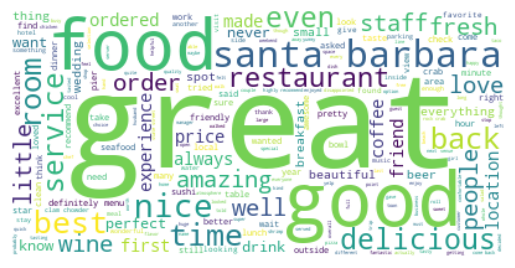

In [138]:

plt.imshow(text, interpolation='bilinear')
plt.axis("off")

In [139]:
# neg_reviews = data.loc[data['pre_process']]---- value 0, 
# pos_reviews = and another one for value 1

In [140]:
pos_reviews = data.loc[(data['label'] >= 1)]
pos_reviews.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,longitude,stars_y,review_count,is_open,attributes,categories,hours,label,pre_process,word_count_vector
325,0gpMpuWPHRzd7dYnhauPIA,5ol9BXH0P2Gz4INDDG4LqQ,syuKX2pH3JJhOOppzNI6SA,5,2,0,0,"We heard rumors that Yoichi's was finally open for service so decided to check it out last week. I'm actually hesitant to fill out this Yelp review for selfish reasons because I want to keep this secluded, delicious little culinary escape for myself! Although if it closed that would be heart breaking so here it goes... The food was fresh and magnificently beautiful. Our whole table ordered the 7 pate tasting menu and left the plate decisions up to the chef. We were politely delivered flavorful fish dishes that I had never had in all different forms-as well as sushi. I can't remember the names of all the fish and dishes, we were all having such a great time yapping about all the different flavors - who's got time to take notes? In short, the restaurant was inviting, the staff cared for our needs, the food was delivered promptly, it was visually beautiful, and quite satisfying in regards to taste. I WILL go back again, perhaps after all these 5 star reviews I'll have to make a resi though.",2015-07-17 21:58:03,Yoichi's,...,-119.702479,4.5,184,1,"{'BestNights': ""{'monday': False, 'tuesday': False, 'friday': True, 'wednesday': False, 'thursday': False, 'sunday': True, 'saturday': True}"", 'NoiseLevel': ""u'quiet'"", 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'DogsAllowed': 'False', 'RestaurantsAttire': ""u'casual'"", 'WheelchairAccessible': 'True', 'BikeParking': 'False', 'Alcohol': ""u'beer_and_wine'"", 'BusinessAcceptsCreditCards': 'True', 'GoodForKids': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsTableService': 'True', 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': True, 'brunch': False, 'breakfast': False}"", 'HappyHour': 'False', 'RestaurantsReservations': 'True', 'HasTV': 'False', 'GoodForDancing': 'False', 'Caters': 'False', 'RestaurantsPriceRange2': '4', 'OutdoorSeating': 'False', 'WiFi': ""u'no'"", 'RestaurantsTakeOut': 'True', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}"", 'RestaurantsDelivery': 'None'}","Restaurants, Nightlife, Japanese, Bars","{'Thursday': '17:0-21:0', 'Friday': '17:0-21:0', 'Saturday': '17:0-21:0', 'Sunday': '17:0-21:0'}",1,heard rumor yoichi finally open service decided check last week actually hesitant fill yelp review selfish reason want keep secluded delicious little culinary escape although closed would heart breaking go food fresh magnificently beautiful whole table ordered pate tasting menu left plate decision chef politely delivered flavorful fish dish never different formsas well sushi remember name fish dish great time yapping different flavor got time take note short restaurant inviting staff cared need food delivered promptly visually beautiful quite satisfying regard taste go back perhaps star review make resi though,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
326,tIyatjzHdL6nAky9LPuqZw,ruLA2PDbQDTz8dW1SbY9cw,34Eqv8jXgxg_EEwcsNgeeg,5,0,0,0,"OKAY - LOVE LOVE LOVE THIS PLACE. Not just for breakfast either. It is healthy and while the downtown location is sometimes difficult to park by, the La Cumbre location is WICKEDLY easy and fast.\n\nThe bowls are delicious - I always get the island bowl and coffee with cashew milk - delicious.\n\nThe employees are great. Brought in my best guy and he adored it - even over his choice room service at

In [141]:
neg_reviews = data.loc[(data['label'] == 0)]
neg_reviews.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,longitude,stars_y,review_count,is_open,attributes,categories,hours,label,pre_process,word_count_vector
0,7Lsue1__5v3-Y_PF2CS7bA,4LbxeQIyej3mr6HYYTsd7Q,SZU9c8V2GuREDN5KgyHFJw,1,0,0,0,First off the bathroom smell like dirty seafood which almost took away my appetite to start with we order the king crab and lobster tacos there was hardly any meat in the king crab and considering that it was more expensive than the 3 pounds of a different kind of crab you would think that there would've been plenty of meat My lobster tacos was over an under cooked but the next two days hunched over the toilet so disappointed,2016-04-23 22:06:09,Santa Barbara Shellfish Company,...,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsReservations': 'False', 'BusinessAcceptsCreditCards': 'True', 'NoiseLevel': ""u'average'"", 'RestaurantsPriceRange2': '2', 'RestaurantsGoodForGroups': 'False', 'WiFi': ""u'no'"", 'Alcohol': ""'beer_and_wine'"", 'RestaurantsTakeOut': 'True', 'BikeParking': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': True, 'lot': False, 'valet': False}"", 'HasTV': 'False', 'ByAppointmentOnly': 'False', 'GoodForKids': 'True', 'Caters': 'False', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': True}"", 'RestaurantsDelivery': 'True', 'HappyHour': 'False', 'Music': ""{u'dj': False, u'live': False, u'jukebox': False, u'video': False, u'background_music': False, u'karaoke': False, u'no_music': False}"", 'GoodForMeal': ""{u'breakfast': False, u'brunch': None, u'lunch': True, u'dinner': True, u'latenight': False, u'dessert': False}"", 'CoatCheck': 'False', 'BestNights': ""{u'monday': False, u'tuesday': False, u'wednesday': False, u'thursday': False, u'friday': False, u'saturday': True, u'sunday': False}"", 'BusinessAcceptsBitcoin': 'False'}","Live/Raw Food, Restaurants, Seafood, Beer Bar, Beer, Wine & Spirits, Bars, Food, Nightlife","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-14:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0', 'Sunday': '11:0-21:0'}",0,first bathroom smell like dirty seafood almost took away appetite start order king crab lobster taco hardly meat king crab considering expensive pound different kind crab would think would plenty meat lobster taco cooked next two day hunched toilet disappointed,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,NZzgLC06h1lXpgqYeHVSxQ,ZbDR27cCgShAdKU2TQXwKg,q6661I3CGW0UB740E5Zjfw,1,1,0,0,"Quite possibly the worst ""indian"" food I have ever experienced. Not a hater. This is based on takeout so I have no experience with the service.\n\nBland, bland, bland, burnt, and awful. Love Indian food. I wish this approximated it.\n\nOur order consisted of fairly pedantic fare, as far as Indian goes:\n\n-pappadam...not on menu they went to the Nepalese place across the street to buy it...chutney. ...noooope\n- chicken tikka (date ordered it , don't judge) tasted like tomato soup with tandoori chix\n- chicken jalfreizi, ordered Indian spicy, had canned veggies in it, in a broth - like substance, unedible\n- Naan- was ABC and dry, oh and burnt-to-beat-the-band.\n- garlic kulcha- only edible item. Tho it was neither garlic or kulcha\n\nAll for the low, low price of 70 cold stones. \n\nIf you like a bizzaro world of Sysco ""Indian food"" this your place. If u want anything close to Indian.....wide berth from your local India garden.",2015-03-05 04:49:10,India House,...,-119.694577,2.0,136,0,"{'RestaurantsAttire': ""u'casual'"", 'WiFi': ""u'free'

In [142]:
pos_text_string = [' '.join(pos_reviews['pre_process'])]
pos_text_string

['heard rumor yoichi finally open service decided check last week actually hesitant fill yelp review selfish reason want keep secluded delicious little culinary escape although closed would heart breaking go food fresh magnificently beautiful whole table ordered pate tasting menu left plate decision chef politely delivered flavorful fish dish never different formsas well sushi remember name fish dish great time yapping different flavor got time take note short restaurant inviting staff cared need food delivered promptly visually beautiful quite satisfying regard taste go back perhaps star review make resi though okay love love love place breakfast either healthy downtown location sometimes difficult park la cumbre location wickedly easy fast bowl delicious always get island bowl coffee cashew milk delicious employee great brought best guy adored even choice room service season yum fiance best time red piano pianist talented sangplayed music today also take request great singing voice f

In [143]:
pd.options.display.max_colwidth = 10000 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

L = pos_text_string

#create new df 
pos_df = pd.DataFrame({'col':pos_text_string})
print (pos_df)

[('place', 184), ('food', 168), ('one', 139), ('u', 111), ('good', 111)]
[('place', 1.0), ('food', 0.9130434782608695), ('one', 0.7554347826086957), ('u', 0.6032608695652174), ('good', 0.6032608695652174)]


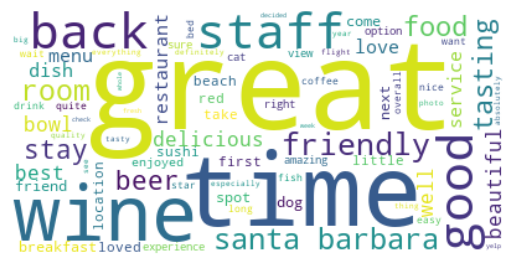

In [151]:

stop_words = ["went", "really", "go", "going", "place", "day", "night", "one", "alway", "say", "make", "review", "got", "took", "around", "much", "came"] + list(STOPWORDS)
text = WordCloud(max_words=75, stopwords = stop_words, min_word_length =3, background_color='white').generate(pos_df['col'].to_string())
plt.imshow(text, interpolation='bilinear')
plt.axis("off")

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])


In [145]:
neg_text_string = [' '.join(neg_reviews['pre_process'])]
neg_text_string

['first bathroom smell like dirty seafood almost took away appetite start order king crab lobster taco hardly meat king crab considering expensive pound different kind crab would think would plenty meat lobster taco cooked next two day hunched toilet disappointed quite possibly worst indian food ever experienced hater based takeout experience service bland bland bland burnt awful love indian food wish approximated order consisted fairly pedantic fare far indian go pappadam menu went nepalese place across street buy chutney noooope chicken tikka date ordered judge tasted like tomato soup tandoori chix chicken jalfreizi ordered indian spicy canned veggie broth like substance unedible naan abc dry oh burnttobeattheband garlic kulcha edible item tho neither garlic kulcha low low price cold stone like bizzaro world sysco indian food place u want anything close indian wide berth local india garden last time use fedex office went passport photo two guy working ten minute standing counter neit

In [146]:
pd.options.display.max_colwidth = 10000 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

N = neg_text_string

#create new df 
neg_df = pd.DataFrame({'col':neg_text_string})
neg_df

col
0  first bathroom smell like dirty seafood almost took away appetite start order king crab lobster taco hardly meat king crab considering expensive pound different kind crab would think would plenty meat lobster taco cooked next two day hunched toilet disappointed quite possibly worst indian food ever experienced hater based takeout experience service bland bland bland burnt awful love indian food wish approximated order consisted fairly pedantic fare far indian go pappadam menu went nepalese place across street buy chutney noooope chicken tikka date ordered judge tasted like tomato soup tandoori chix chicken jalfreizi ordered indian spicy canned veggie broth like substance unedible naan abc dry oh burnttobeattheband garlic kulcha edible item tho neither garlic kulcha low low price cold stone like bizzaro world sysco indian food place u want anything close indian wide berth local india garden last time use fedex office went passport photo two guy working ten minute standing counter neither ever acknowledged existed even looked way waited line customer waiting pay formed behind originally thought would faster taking picture cropping printing gave fedex went know else passport photo copy certainly choose use local bill copy shop previous bad experience fedex copy waste time waited hour pizza called number u employee rude would never recommend place would give negative star possible staff h worst retail employee ever encountered friday sept friend came find dress upcoming presentation young man running dressing room sarcastic rude customer yelling welcome obviously exaggerated disingenuous manner finally found came power went asked drop item exit store asked way could hold item staff member said would put hold name saturday sept returned right store opened staff unhelpful made little effort try find item thought hold looked around rack desired item nowhere found asked several employee help could bothered care point u direction fitting room friend finished returned number employee walked away fitting room staff asked item proceeded talk annoying helping u job get retail employee late saturday morning rude simply asked saw dress could possibly help u find looking bothered help customer working customer service talking crap customer job especially hear never acceptable good luck real world lady hope catty job attitude take far also fitting room floor absolutely filthy brand new pink sock standing floor bottom became black dirt dust usually come place lot enjoy smoothy acai bowl time sometimes wait get pretty bad nothing crazy today ordered hercules smoothie get time wait usually min today waited min smoothie go ask smoothie waiting min found even started watch guy behind counter make smoothie le minute honestly probably one worst smoothy ever bought dont think ever come back could made better smoothie disappointing ghetto hole wall chip free salsa bar nasty dirty seems like everything either sticky greasy try might thing people work nice food good got carne asada burrito meat tough gristly picked outspit half gross rice bean tortilla yummy horchata scratch tasted powdery guess got wrong stuff havent year excited go back unfortunately disappointed waitress never brought u bread ask bus boy garlic bread cold stale like made day ordered ahi skewer shepherd side salad salad consisted mixed green cherry tomato tossed vinaigrette boring ahi slightly overcooked dry like oakgrilled flavor also came rice quite oily husband tritip sandwich actually turned sliced roast beef weird rest guest said food ok worthy coming back young waitress seemed nice enough honestly terrible going back nearly good used mediocre food traveled world search great thai food poor offering nice decor though ordered build scramble go russet potato spinach house cured salmon pepper jack cheese poached egg hollandaise sauce sound delicious received left quite bit desired potato well cooked lack sort seasoning spinach nonexistent like spinach egg overpoached point har

[('place', 184), ('food', 168), ('one', 139), ('u', 111), ('good', 111)]
[('place', 1.0), ('food', 0.9130434782608695), ('one', 0.7554347826086957), ('u', 0.6032608695652174), ('good', 0.6032608695652174)]


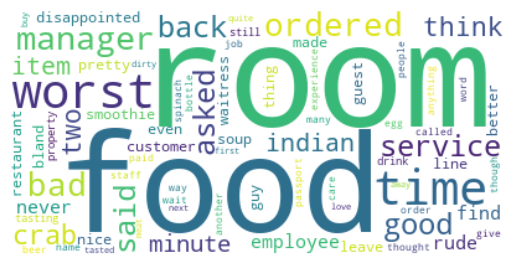

In [152]:
stop_words = ["went", "really", "go", "going", "place", "day", "night", "one", "alway", "say", "make", "review", "got", "took", "around", "much", "came"] + list(STOPWORDS)
text = WordCloud(max_words=75, stopwords = stop_words, min_word_length =3, background_color='white').generate(neg_df['col'].to_string())
plt.imshow(text, interpolation='bilinear')
plt.figure
plt.axis("off")

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])


In [148]:
neg_df['col'].value_counts()

first bathroom smell like dirty seafood almost took away appetite start order king crab lobster taco hardly meat king crab considering expensive pound different kind crab would think would plenty meat lobster taco cooked next two day hunched toilet disappointed quite possibly worst indian food ever experienced hater based takeout experience service bland bland bland burnt awful love indian food wish approximated order consisted fairly pedantic fare far indian go pappadam menu went nepalese place across street buy chutney noooope chicken tikka date ordered judge tasted like tomato soup tandoori chix chicken jalfreizi ordered indian spicy canned veggie broth like substance unedible naan abc dry oh burnttobeattheband garlic kulcha edible item tho neither garlic kulcha low low price cold stone like bizzaro world sysco indian food place u want anything close indian wide berth local india garden last time use fedex office went passport photo two guy working ten minute standing counter neithe

[('place', 184), ('food', 168), ('one', 139), ('u', 111), ('good', 111)]
[('place', 1.0), ('food', 0.9130434782608695), ('one', 0.7554347826086957), ('u', 0.6032608695652174), ('good', 0.6032608695652174)]


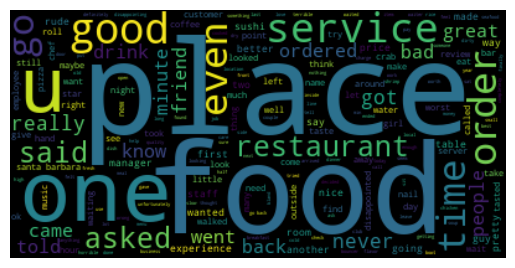

In [150]:
# Look at an article to figure out word frequency: https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

# create a dictionary of word frequencies
text = ' '.join(neg_text_string) # create string out of a list
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
# 
#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()